Animação salva como 'sgd-momentum-vector.html'


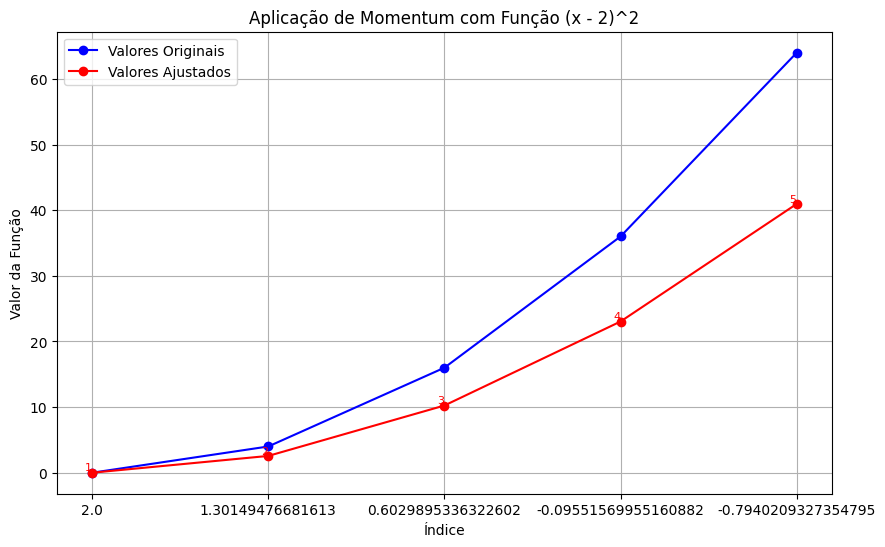

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Função simples de exemplo para otimização (f(x) = (x - 2)^2)
def func(x):
    return (x - 2) ** 2

# Gradiente da função (derivada de f(x))
def grad(x):
    return 2 * (x - 2)

# Parâmetros do momentum
learning_rate = 0.1  # Taxa de aprendizado
momentum = 0.9  # Fator de momentum

# Vetor inicial
x = np.array([2, 4, 6, 8, 10])
num_passos = 20

# Inicialização da velocidade
velocidade = np.zeros_like(x)

# Armazenar valores ajustados
valores_ajustados = np.zeros((num_passos, len(x)))

# Aplicando o momentum
for i in range(num_passos):
    g = grad(x)  # Calcula o gradiente
    velocidade = momentum * velocidade - learning_rate * g  # Atualiza a velocidade com o momentum
    x = x + velocidade  # Ajusta a posição
    valores_ajustados[i] = x

# Visualização dos resultados
fig, ax = plt.subplots(figsize=(10, 6))

# Função de atualização para a animação
def update(frame):
    ax.clear()
    x_vals = np.arange(len(x))
    y_vals_orig = func(np.array([2, 4, 6, 8, 10]))
    y_vals_current = func(valores_ajustados[frame])
    
    # Plotando os valores originais
    ax.plot(x_vals, y_vals_orig, 'o-', color='blue', label='Valores Originais')

    # Plotando os valores ajustados com momentum
    ax.plot(x_vals, y_vals_current, 'o-', color='red', label='Valores Ajustados')

    # Adicionando números na curva ajustada
    for idx, value in enumerate(valores_ajustados[frame]):
        ax.text(idx, func(value), str(idx + 1), fontsize=8, ha='right', va='bottom', color='red')
    
    ax.set_xticks(x_vals)
    ax.set_xticklabels([f"{i}" for i in x])
    ax.set_xlabel('Índice')
    ax.set_ylabel('Valor da Função')
    ax.set_title('Aplicação de Momentum com Função (x - 2)^2')
    ax.legend()
    ax.grid(True)

# Criando a animação
ani = FuncAnimation(fig, update, frames=num_passos, interval=500, repeat=False)

# Salvando a animação como um arquivo HTML
ani.save('sgd-momentum-vector.html', writer='html')

print("Animação salva como 'sgd-momentum-vector.html'")
